In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cars = pd.read_csv('cars.csv')

for columns in cars.columns:
    for i in range(cars.shape[0]):
        temp = cars.loc[i,columns].split('[')
        cars.loc[i,columns] = temp[1]
        temp_bis = cars.loc[i,columns].split(',')
        cars.loc[i,columns] = temp_bis[0]

n_samples = cars.shape[0]

cars['Speed'] = pd.to_numeric(cars['Speed'])
cars['Distance'] = pd.to_numeric(cars['Distance'])
cars.columns = ['speed','distance']

/tmp/ipykernel_2217/525343838.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='.',color='b')
/tmp/ipykernel_2217/525343838.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='.',color='b')
/tmp/ipykernel_2217/525343838.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0],gaussian_red[:,1],'bo',marker='.',color='r')
/tmp/ipykernel_2217/525343838.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take preced

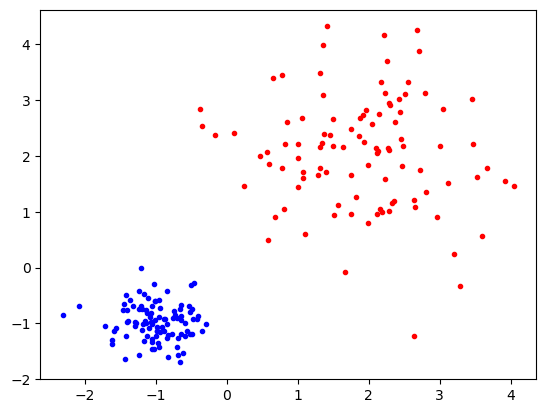

In [2]:
gaussian_blue = np.random.multivariate_normal(mean=np.array((-1,-1)),cov=np.eye(2)*1/8,size=100)
gaussian_red = np.random.multivariate_normal(mean=np.array((2,2)),cov=np.eye(2),size=100)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='.',color='b')
plt.plot(gaussian_red[:,0],gaussian_red[:,1],'bo',marker='.',color='r')

In [3]:
list_of_output = np.empty(200)
for i in range(100):
    list_of_output[i] = -1
    list_of_output[i+100] = 1

In [4]:
data = np.vstack((gaussian_blue,gaussian_red))
outcome = list_of_output

In [5]:
n_samples = 200

In [6]:
def rbf(x,y,l=1):
    """Gaussian kernel of dimension 1

    Parameters
    -------------------------------
    x : float
    a real number

    y : float
    a real number

    l: float, non zero
    a scale parameter
    -------------------------------
    """
    dim = x.shape[0]
    vect = np.empty(dim)
    if dim == y.shape[0]  :
        d = np.exp(-((np.linalg.norm(x-y))**2)/(2*(l**2)))
        return d
    else :
        for i in range(dim):
            vect[i] = np.exp(-((np.linalg.norm(x[i] - y))**2)/(2*(l**2)))
        return vect

In [7]:
gamma = 1

In [8]:
omega = np.empty((n_samples,n_samples))
for k in range(n_samples):
    for i in range(n_samples):
        omega[k,i] = outcome[k]*outcome[i]*rbf(x=data[k,:],y=data[i,:],l=1)

In [9]:
first_row = np.hstack((0,-np.transpose(outcome)))

In [10]:
first_row = first_row.reshape(1,first_row.shape[0])

In [11]:
bot_of_mat_right = omega + (1/gamma)*np.eye(n_samples)

In [12]:
bot_of_mat = np.hstack((outcome.reshape(n_samples,1), bot_of_mat_right))

In [13]:
whole_mat = np.vstack((first_row, bot_of_mat))

In [14]:
right_hand = np.ones(n_samples+1)
right_hand[0] = 0

In [15]:
coeffs = np.linalg.solve(a=whole_mat,b=right_hand)

In [16]:
coeffs.shape

(201,)

In [17]:
b = coeffs[0]
alpha = coeffs[1:201]

In [18]:
test_data = np.random.uniform(low=-3,high=3,size=(10000,2))

In [19]:
results = np.empty(10000)

In [20]:
for i in range(10000):
    results[i] = np.sign(np.sum(alpha*outcome*rbf(x=data,y=test_data[i,:],l=1))+b)

In [21]:
big_df = pd.DataFrame(data)

In [22]:
big_df.columns = ['x1','x2']

In [23]:
positives = np.zeros(10000)
negatives = np.zeros(10000)
for i in range(10000):
    if results[i] == 1:
        positives[i] = 1
    else:
        negatives[i] = -1
        

In [24]:
point_labels = positives+negatives

In [25]:
#just realize this solution is absolutely not efficient nor coherent, I will change it later, very tired

In [26]:
df_test = pd.DataFrame(test_data)
df_test.columns = ['x1','x2']
df_test['label'] = point_labels

/tmp/ipykernel_2217/2658847556.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='*',color='b')
/tmp/ipykernel_2217/2658847556.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='*',color='b')
/tmp/ipykernel_2217/2658847556.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0],gaussian_red[:,1],'bo',marker='*',color='r')
/tmp/ipykernel_2217/2658847556.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take pr

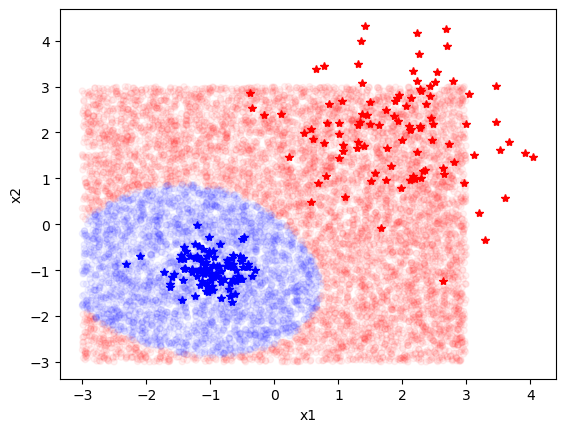

In [27]:
colors = {-1:'blue', 1:'red'}
color_list = [colors[group] for group in df_test['label']]
ax = df_test.plot.scatter('x1','x2', c=color_list, alpha=0.05)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1],'bo',marker='*',color='b')
plt.plot(gaussian_red[:,0],gaussian_red[:,1],'bo',marker='*',color='r')